<a href="https://colab.research.google.com/github/Datanerd97/MTA_Painting_EDA/blob/main/MTA_Subway_Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MTA Subway Project

This is gonna be just viewing a dataset about the MTA Subway Art Gallery dataset, possibly make some visualizations at the end of it, maybe model-driven EDA cause why not?

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Data Dictionary

Contains information about the dataset and its contents.


* Agency
This is the abbreviated code for an agency. Example: LIRR=Long Island Rail Road, MNR = Metro-North Railroad, NYCT = New York City Transit
agency
Text
* Station Name
This is the railroad or subway station where the art is located
station_name
Text
* Line
This is the railroad or subway line that is associated with the station
line
Text
* Artist
The artist’s name(s)
artist
Text
* Art Title
This is the name of the piece of art
art_title
Text
* Art Date
This is the year the art was first displayed at the station
art_date
Text
* Art Material
This describes what materials were used in making the art
art_material
Text
* Art Description
This is a description of the art along with other interesting facts
art_description
Text
* Art Image Link
This is a link that can take you directly to the MTA website so you may see the available art
art_image_link
URL

In [3]:
!pip install sodapy

In [6]:
# Import data

from sodapy import Socrata

client = Socrata("data.ny.gov",None)


#  First 2k results, as returned from JSON from API/ converted to lists of dictionary
results = client.get("4y8j-9pkd", limit=2000)

# Convert to pd.DataFrame
results_df = pd.DataFrame(results)

In [7]:
results_df

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,Terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,{'url': 'https://new.mta.info/agency/arts-desi...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",{'url': 'https://new.mta.info/agency/arts-desi...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",{'url': 'https://new.mta.info/agency/arts-desi...
3,NYCT,Kings Hwy,"B,Q",Rhoda Andors,Kings Highway Hieroglyphs,1987,Porcelain Enamel Murals on Steel,The artist discusses her work: ÒIf public art...,{'url': 'https://new.mta.info/agency/arts-desi...
4,NYCT,Newkirk Av,"B,Q",David Wilson,Transit Skylight,1988,Zinc-glazed Apolycarbonate skylight,"The artist recalls, ÒAbout the same time that ...",{'url': 'https://new.mta.info/agency/arts-desi...
...,...,...,...,...,...,...,...,...,...
376,NYCT,Alabama Av,"J,Z",Scott Redden,Untitled,2007,Faceted glass,Images of rural America evoke a nostalgia past...,{'url': 'https://new.mta.info/agency/arts-desi...
377,NYCT,Woodside-61 St,7,John Cavanagh,Commuting/Community,1986,Porcelain enamel photomontage murals on steel,Commuting/Community reflects John Cavanagh's i...,{'url': 'https://new.mta.info/agency/arts-desi...
378,NYCT,Fulton St,"A, C, J, Z, 2, 3, 4, 5",Nancy Holt,Astral Grating,1987,"Wrought iron, light elements",Nancy Holt's steel ceiling sculpture incorpora...,{'url': 'https://new.mta.info/agency/arts-desi...
379,NYCT,5 Av/53 St,"E,M",Ralph Fasanella,Subway Riders,1995,Painting - Oil,All of us find ourselves from time to time mus...,{'url': 'https://new.mta.info/agency/arts-desi...


In [14]:
### Exploratory Data Analysis
len(results_df.station_name.unique())

309

There are 309 unique stations that has a commissoned public art that are seen by millions of vistors.

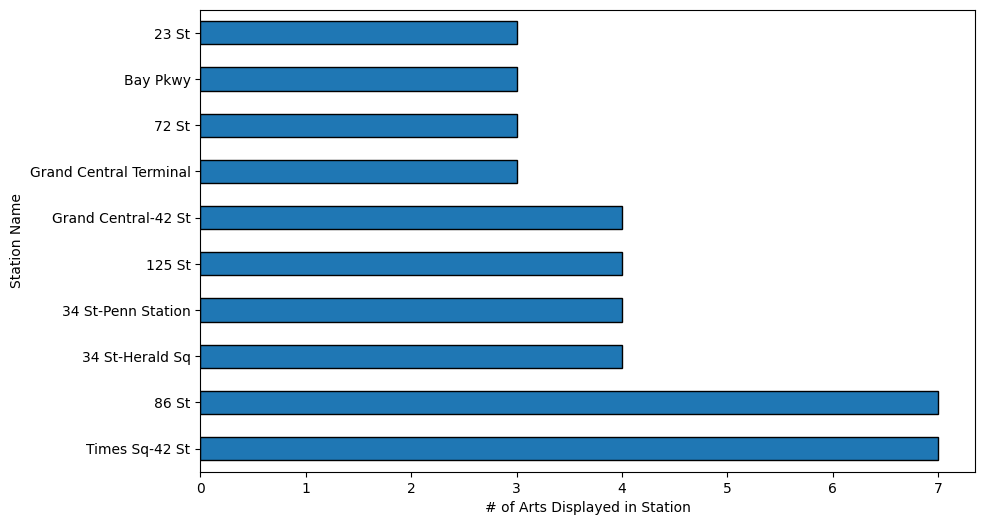

In [50]:
## Which stations has the most art pieces commisoned within its station..?
results_df.station_name.value_counts()[:10].plot(kind = 'barh',
                                                 xlabel = '# of Arts Displayed in Station',
                                                 ylabel = 'Station Name',
                                                 figsize = (10,6),
                                                 edgecolor = 'black');

There are at most seven art pieces displayed at subway stations. Most of these pieces are displayed at the Manhattan Stations. Make sense since stations located in the Manhattan borough gets a lot of foot-traffic for viewing.

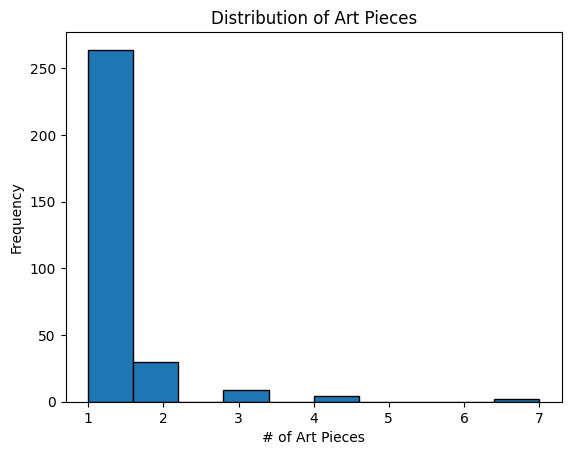

In [49]:
results_df.station_name.value_counts().plot.hist(edgecolor = 'black')
plt.xlabel('# of Art Pieces')
plt.ylabel('Frequency')
plt.title('Distribution of Art Pieces')
plt.show()

In [28]:
# Check The Distribution of Painting Dates?
results_df.head()

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
0,NYCT,Clark St,"2,3",Ray Ring,Clark Street Passage,1987,Terrazzo floor tile,The first model that Brooklyn-born artist Ray ...,{'url': 'https://new.mta.info/agency/arts-desi...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",{'url': 'https://new.mta.info/agency/arts-desi...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",{'url': 'https://new.mta.info/agency/arts-desi...
3,NYCT,Kings Hwy,"B,Q",Rhoda Andors,Kings Highway Hieroglyphs,1987,Porcelain Enamel Murals on Steel,The artist discusses her work: ÒIf public art...,{'url': 'https://new.mta.info/agency/arts-desi...
4,NYCT,Newkirk Av,"B,Q",David Wilson,Transit Skylight,1988,Zinc-glazed Apolycarbonate skylight,"The artist recalls, ÒAbout the same time that ...",{'url': 'https://new.mta.info/agency/arts-desi...


In [30]:
results_df.art_date.unique()

array(['1987', '1986', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '1980'],
      dtype=object)

In [36]:
# Sort the results df by art_date and so

results_dff = results_df.sort_values(by = 'art_date')
results_dff.art_date.unique()

array(['1980', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

So the oldest public painting art was created in the 1980s

In [48]:
# Check the distribution of values
results_dff.art_date.value_counts().head(5)

,count
art_date,
2018,38
2011,21
2002,17
2017,16
2006,15


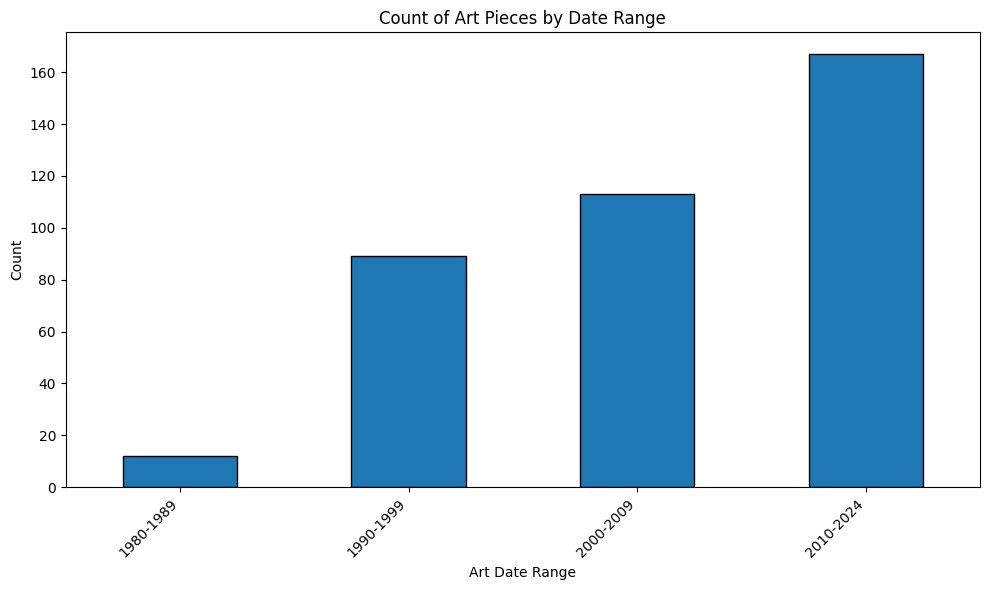

In [45]:
# Define the bins
bins = [1980, 1990, 2000, 2010, 2025]

# Create labels for the bins
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Convert 'art_date' to numeric, coercing errors
results_dff['art_date'] = pd.to_numeric(results_dff['art_date'], errors='coerce')


# Categorize 'art_date' into bins and count values in each bin
binned_counts = pd.cut(results_dff['art_date'], bins=bins, labels=labels, right=False).value_counts().sort_index()

# Check pd.cut documentation)
# Use cut when you need to segment and sort data values into bins

# Plot the counts as a bar chart
plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Art Date Range')
plt.ylabel('Count')
plt.title('Count of Art Pieces by Date Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [46]:
print(binned_counts)

art_date
1980-1989     12
1990-1999     89
2000-2009    113
2010-2024    167
Name: count, dtype: int64


We notice that there are a lot of recent works of commissoned arts that are on display as opposed to older arts.

In [51]:
# Most art names that pops ups frequently
results_dff.head()

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
367,NYCT,DeKalb Av,"B,D,Q",Bill Brand,Masstransiscope,1980,"Hand painted panels, Lighting","A disarmingly simple artwork, placed in the un...",{'url': 'https://new.mta.info/agency/arts-desi...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",{'url': 'https://new.mta.info/agency/arts-desi...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",{'url': 'https://new.mta.info/agency/arts-desi...
377,NYCT,Woodside-61 St,7,John Cavanagh,Commuting/Community,1986,Porcelain enamel photomontage murals on steel,Commuting/Community reflects John Cavanagh's i...,{'url': 'https://new.mta.info/agency/arts-desi...
378,NYCT,Fulton St,"A, C, J, Z, 2, 3, 4, 5",Nancy Holt,Astral Grating,1987,"Wrought iron, light elements",Nancy Holt's steel ceiling sculpture incorpora...,{'url': 'https://new.mta.info/agency/arts-desi...


In [72]:
results_dff.artist.value_counts()

,count
artist,
Kathleen McCarthy,5
Andrea Dezsš,3
Laura F. Gibellini,3
Wopo Holup,3
Yumi Heo,3
...,...
Jane Greengold & Kane Chanh Do,1
Keith Godard,1
Mara Held,1


There are 334 types of artists that have their art displayed at the subway stations.

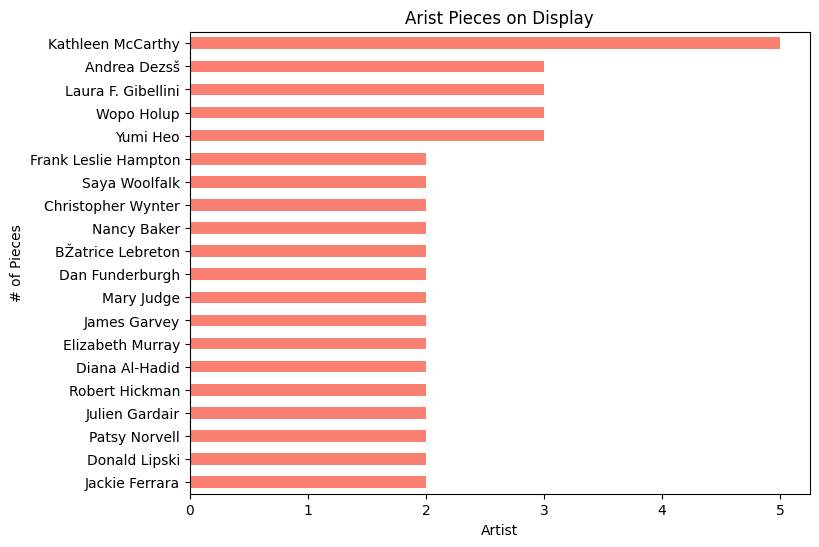

In [70]:
# Set the thing to ax and then you have to invert the y-axis..
ax = results_dff.artist.value_counts()[:20].plot.barh(xlabel = 'Artist',
                                                 ylabel = '# of Pieces',
                                                 title = 'Arist Pieces on Display',
                                                 figsize = (8,6),
                                                 color = 'salmon')
ax.invert_yaxis(); # Invert the y-axis

We notice that Kathleen McCarthy has the most Art Pieces on Display within the MTA Subway stations, then Andrea Dezss, and Laura F. Gibellini.

### Focus on Kathleen MccCarthy

What makes her painting special that is allowed to have her pieces on Display?

In [73]:
Kathleen_df = results_dff[results_dff['artist'] == 'Kathleen McCarthy']
Kathleen_df

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
371,NYCT,75 St,"J,Z",Kathleen McCarthy,Five Points of Observation,1990,Copper wire mesh and Stainless steel,"Five Points of Observation, sited on the platf...",{'url': 'https://new.mta.info/agency/arts-desi...
372,NYCT,Cypress Hills,"J,Z",Kathleen McCarthy,Five Points of Observation,1990,Copper wire mesh and Stainless steel,"Five Points of Observation, sited on the platf...",{'url': 'https://new.mta.info/agency/arts-desi...
15,NYCT,Woodhaven Blvd,"J,Z",Kathleen McCarthy,Five Points of Observation,1990,Copper wire mesh and Stainless steel,"Five Points of Observation, sited on the platf...",{'url': 'https://new.mta.info/agency/arts-desi...
13,NYCT,104 St,"J,Z",Kathleen McCarthy,Five Points of Observation,1990,Copper wire mesh and Stainless steel,"Five Points of Observation, sited on the platf...",{'url': 'https://new.mta.info/agency/arts-desi...
14,NYCT,111 St,"J,Z",Kathleen McCarthy,Five Points of Observation,1990,Copper wire mesh and Stainless steel,"Five Points of Observation, sited on the platf...",{'url': 'https://new.mta.info/agency/arts-desi...


Viewing the Data-Frame it seems there is no distinct reason but her five painting are displayed on the J,Z line.

### Looking at the type of art material used.

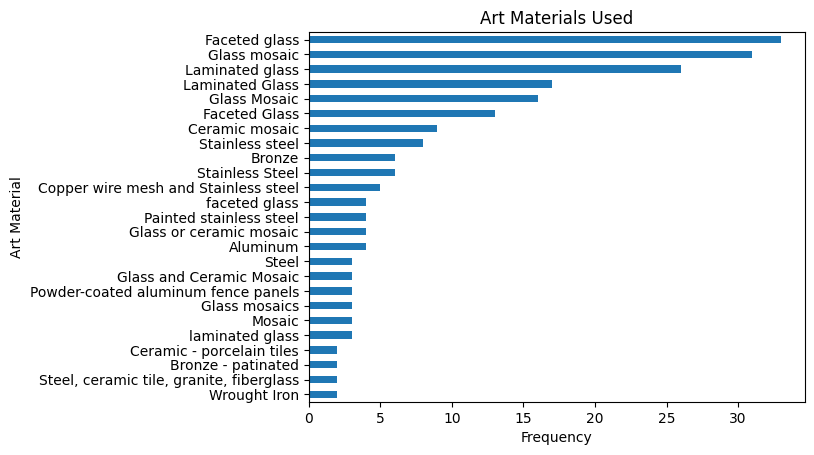

In [81]:
ax = results_dff.art_material.value_counts()[:25].plot.barh(title = 'Art Materials Used',
                                                       ylabel = 'Art Material',
                                                       xlabel = 'Frequency');
ax.invert_yaxis()

It appears that Faceted glass were commonly used and then Glass Mosaic was followed on these commissoned paintings.

### Check the Art Description


In [84]:
results_dff.head()

,agency,station_name,line,artist,art_title,art_date,art_material,art_description,art_image_link
367,NYCT,DeKalb Av,"B,D,Q",Bill Brand,Masstransiscope,1980,"Hand painted panels, Lighting","A disarmingly simple artwork, placed in the un...",{'url': 'https://new.mta.info/agency/arts-desi...
1,NYCT,125 St,"4,5,6",Houston Conwill,The Open Secret,1986,Bronze - polychromed,"The Open Secret, in the 125th Street and Lexin...",{'url': 'https://new.mta.info/agency/arts-desi...
2,NYCT,Astor Pl,6,Milton Glaser,Untitled,1986,Porcelain enamel murals,"Milton Glaser, best known for his work in grap...",{'url': 'https://new.mta.info/agency/arts-desi...
377,NYCT,Woodside-61 St,7,John Cavanagh,Commuting/Community,1986,Porcelain enamel photomontage murals on steel,Commuting/Community reflects John Cavanagh's i...,{'url': 'https://new.mta.info/agency/arts-desi...
378,NYCT,Fulton St,"A, C, J, Z, 2, 3, 4, 5",Nancy Holt,Astral Grating,1987,"Wrought iron, light elements",Nancy Holt's steel ceiling sculpture incorpora...,{'url': 'https://new.mta.info/agency/arts-desi...


In [82]:
results_dff.art_description

,art_description
367,"A disarmingly simple artwork, placed in the un..."
1,"The Open Secret, in the 125th Street and Lexin..."
2,"Milton Glaser, best known for his work in grap..."
377,Commuting/Community reflects John Cavanagh's i...
378,Nancy Holt's steel ceiling sculpture incorpora...
...,...
362,"Located on Roosevelt Island, the permanent art..."
361,Need The Time Telling update
360,"At the 7 Av station, artist David Rios Ferreir..."
358,ÒGreat Waves of ImmigrationÓ by artist Carmen ...


In [85]:
results_dff.art_description.value_counts()

,count
art_description,
"Five Points of Observation, sited on the platform walls of five adjacent subway stations in Queens, is composed of five colossal six-foot heads made of copper mesh positioned at different angles and inserted in specially cut openings in the windscreen walls that otherwise would block views from the platforms to the streets below. Positioning themselves in the heads, subway riders can look out onto the world literally through the eyes of the sculptural forms. The artist created the faces so as to be both multiethnic and androgynous, leaving room for viewers to construct for themselves stories of who these haunting forms might be and what they might signify. The faces are constructed with steel armatures and a grid of wire mesh, which serves a protective as well as expressive function. Also, the positioning of the forms varies from station to station, giving them further variety and expressiveness.",5
"Dom (Variations) appears as an apparition at the Fresh Pond Station Ð a warm and inviting bedroom welcoming commuters to their home station. A neat bed, wallpapered wall, firm pillows and shiny furniture complete the scene. The artistÕs intent is to reflect the path that flows from within the interior space of a cozy home to the exterior world, tracing the daily commute to work and the return home. Based on the concept of ÒhomeÓ, the mosaic mural, located across from the mezzanine entrance, depicts a lived in domestic interior scene, complete with scattered garments, books and a floor lamp. The pattern of the wallpaper on the bedroomÕs back wall derives from a map, while natural elements like tree-leaves and branches invade the room Ð and seem to themselves form into wallpaper. The image of a window within the mosaic emulates the real windows in the next two stations. It is an innovative use of materials, in the techniques used to print on tile and the combination of subway tile and mosaic to represent depth and texture.\n\nAt the Seneca Avenue and Forest Avenue stations, the imagery printed and hand-painted on glass, is of clothes hanging on clotheslines. Lovingly rendered, the clothing speaks to residents and domesticity, bringing a human scale to an otherwise everyday subway passage. Natural elements and branches and trees can be seen through the semi-translucent glass, echoing the imagery found within the Fresh Pond station mosaic mural. Overall, the work seeks to inspire an ethereal and dreamy atmosphere that evokes memories of the past and of a dreamed home.",3
"When the 7 train emerges from the ground near the East River in Queens, on its way farther into the borough, leaving Manhattan behind, it travels through a succession of stations over one of the most ethnically diverse areas of the city. The renovation of this line included a major work of art to pay homage to the borough and its diversity, in which illustrator Yumi Heo designed 30 faceted-glass panes that have been installed along stationsÕ mezzanines and platforms. Collectively titled Q is for Queens, the component panels successively highlight different aspects of the adjacent neighborhoods Ð events, stores, food, and landmarks. The artist cleverly employs the alphabet Ð A is for Aqueduct racetrack É Z is for Zoo Ð to point out the enormous range of experiences that the area offers.",3
N/A,3
"American Season is a meditation on seasonal changes, living in harmony with nature and each other, and societal changes that come with the passing of time. JudgeÕs work is in three parts that can be seen from multiple perspectives, including from the approaching train, walking through the Wyandanch station house, along the overpass and from the platform below, as well in the shelter shed underway at Pinelawn.\n\nRich colors radiate and envelop viewers passing through American Season: Wyandanch in the station overpass bridge. The bold lines recall the flare of approaching train headlights, or the speeding up and slowing down of a train. The symbolic ex

Very verbose art-description, seems they follow the same frequency of the art paintings.

### Train Lines That Paintings Are Posted On..

In [88]:
results_dff.line.value_counts()

,count
line,
6,20
City Terminal Zone,16
"2,5",16
Port Jefferson,15
1,15
...,...
SIR,1
"C,B",1
N/W,1


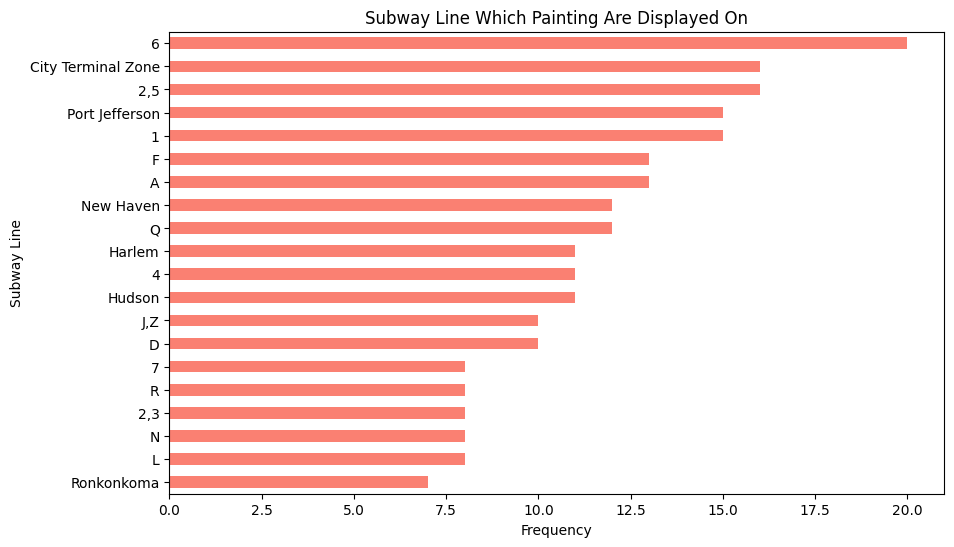

In [90]:
ax = results_dff.line.value_counts()[:20].plot.barh(color = 'salmon',
                                                    xlabel = 'Frequency',
                                                    ylabel = 'Subway Line',
                                                    figsize = (10,6),
                                                    title = 'Subway Line Which Painting Are Displayed On'
                                                    )
ax.invert_yaxis()

### End Of Analysis..

Many Art Pieces are Commisoned along the Manhattan stations notably Time-Square 42 Street and the 86th Street stations with 7 art pieces put on display.  The 6 subway line and the city terminal zone has the greatest frequenct of encountering a city commisoned art. The oldest painting on display is from Kathleen McCarthy a 1990 painting that is display alongside the J,Z line subway stations.

Kathleen has the highest frequency of paintings alongside the subway stations, with all 5 posted alongside the J,Z subway line.